<h1 style="text-align: center;">Discrete Convolution</h1>
<p style="text-align: center;">Lab 3</p>
<p style="text-align: center;">Spring 2025</p>



### 1. Purpose 
Become familiar with convolution and its properties using Python.

### 2. Deliverables Overview 
##### Part 1
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**.  
  
##### Part 2
[ ] Code for **Task 1**.  
[ ] Plots for **Task 2**, **Task 3**, and **Task 4**.  
[ ] Code and plots for **Task 5**.

### 3. Part 1
##### 3.1 Purpose
Use the step and ramp functions developed in **Lab 2** to write functions to use in the rest of this lab.
##### 3.2 Tasks
1. Create the following signals with user-defined functions.  
$$f_1(t) = u(t - 2) - u(t - 9)$$  
$$f_2(t) = e^{-t}u(t)$$  
$$f_3(t) = r(t - 2)[u(t - 2) - u(t - 3)] + r(4 - t)[u(t - 3) - u(t - 4)]$$

In [85]:
# Include all necessary imports here
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# Insert code for functions f1, f2, and f3 here. Remember to include descriptions of each funtion including inputs and outputs
def step(t): 
    y = np.zeros(t.shape) 
    for i in range(len(t)):
        if t[i] < 0:
            y[i] = 0
        else:
            y[i] = 1
    return y 

def ramp(t): 
    y = np.zeros(t.shape) 
    for i in range(len(t)): 
        if t[i] < 0:
            y[i] = 0
        else:
            y[i] = t[i]
    return y

def f1(t):
    y = step(t-2) - step(t-9)
    return y

def f2(t):
    y = np.exp(-t) * step(t)
    return y

def f3(t):
    y = ramp(t-2) * (step(t-2) - step(t-3)) + ramp(4-t) * (step(t-3) - step(t-4))
    return y

2. Plot the three functions in a single figure, seperate subplots, from $0 \le t \le 20$ s with time steps small enough to achieve appropriate resolution.

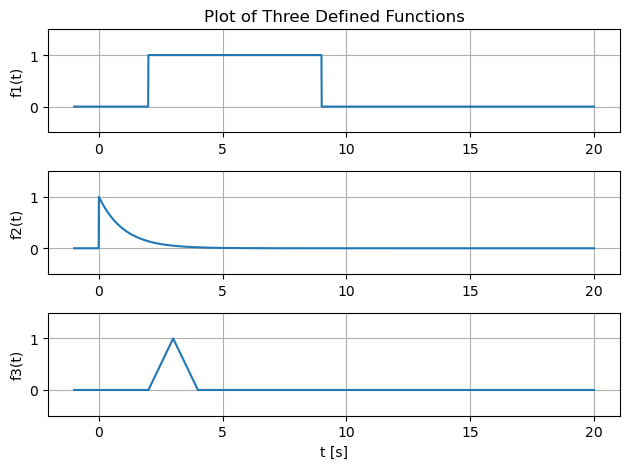

In [87]:
# Insert code to call each function and plot them all in one figure, three subplots, here
steps = 1e-2
t = np.arange(-1, 20+steps, steps)

y1 = f1(t)
y2 = f2(t)
y3 = f3(t)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, y1)
plt.grid()
plt.ylabel(f"f1(t)")
plt.title(f"Plot of Three Defined Functions")
plt.ylim([-0.5, 1.5])

plt.subplot(3, 1, 2)
plt.plot(t, y2)
plt.grid()
plt.ylabel(f"f2(t)")
plt.ylim([-0.5, 1.5])

plt.subplot(3, 1, 3)
plt.plot(t, y3)
plt.grid()
plt.ylabel(f"f3(t)")
plt.ylim([-0.5, 1.5])

plt.xlabel("t [s]")
plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Create code to perform the convolution of two functions. Verify this code with Python's built-in convolution tools.
##### 4.2 Tasks
1. Write your own code to perform convolution. Describe the functionality of your code thoroughly in the function description and using comments where appropriate. *Note: Recall that the duration of a convolution is the sum of the duration of each function convolved. Adjust your plot window sizes and time vectors appropriately. Hint: You will not have to use the numpy integrate function, think back to how you first learned integrals.

In [88]:
# Insert code for your convolution function here
def manual_conv(f1, f2):
    Nf1 = len(f1)
    Nf2 = len(f2)
    f1Extended = np.append(f1, np.zeros((1, Nf2-1)))
    f2Extended = np.append(f2, np.zeros((1, Nf1-1)))
    result = np.zeros(f1Extended.shape)
    
    for i in range(Nf1 + Nf2 - 1):
        result[i] = 0
        for j in range(Nf1):
            if i - j >= 0 and i - j < Nf2:  
                result[i] += f1Extended[j] * f2Extended[i - j]
    return result

2. Plot the convolution of $f_1$ and $f_2$.

In [90]:
# Insert code to plot the appropriate convolution here
steps = 1e-2
t = np.arange(0, 20+steps, steps)
NN = len(t)
tExtended = np.arange(0, 2*t[NN-1],steps)
f1 = f1(t)
f2 = f2(t)
f3 = f3(t)


conv12 = manual_conv(f1, f2)*steps

plt.figure(figsize=(10, 7))
plt.plot(tExtended, conv12, label='User-Defined Convolution')
#plt.ylim([0, 1.2])
plt.grid()
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('$f_1(t)$ * $f_2(t)$')
plt.title('Convolution of $f_1$ and $f_2$')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

3. Plot the convolution of $f_2$ and $f_3$.

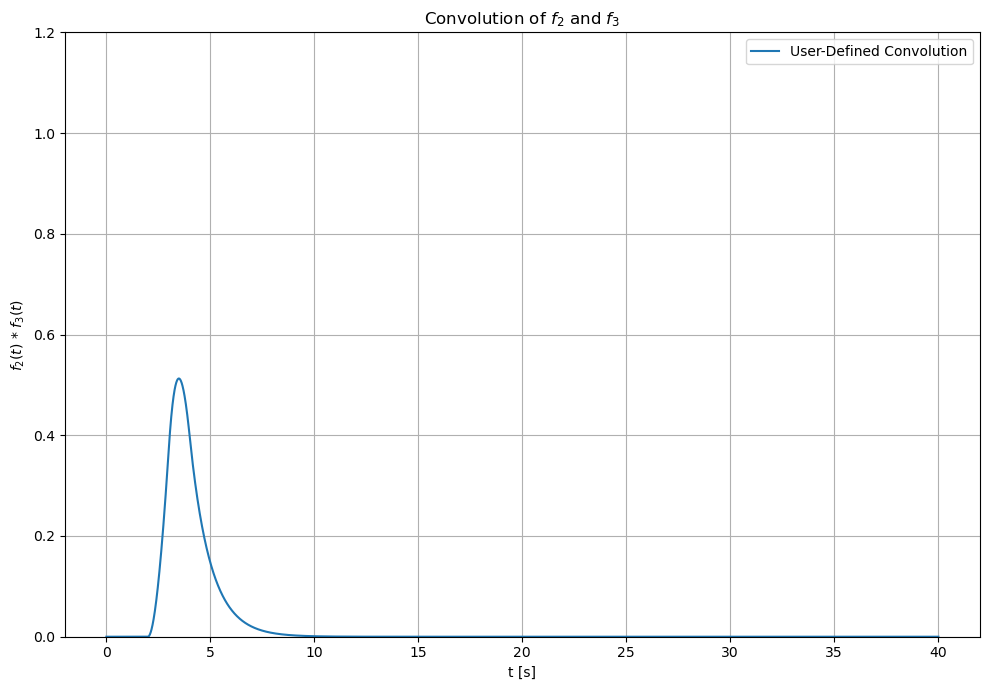

In [13]:
# Insert code to plot the appropriate convolution here
conv23 = manual_conv(f2, f3)*steps

plt.figure(figsize=(10, 7))
plt.plot(tExtended, conv23, label='User-Defined Convolution')
plt.ylim([0, 1.2])
plt.grid()
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('$f_2(t)$ * $f_3(t)$')
plt.title('Convolution of $f_2$ and $f_3$')
plt.tight_layout()
plt.show()

4. Plot the convolution of $f_1$ and $f_3$.

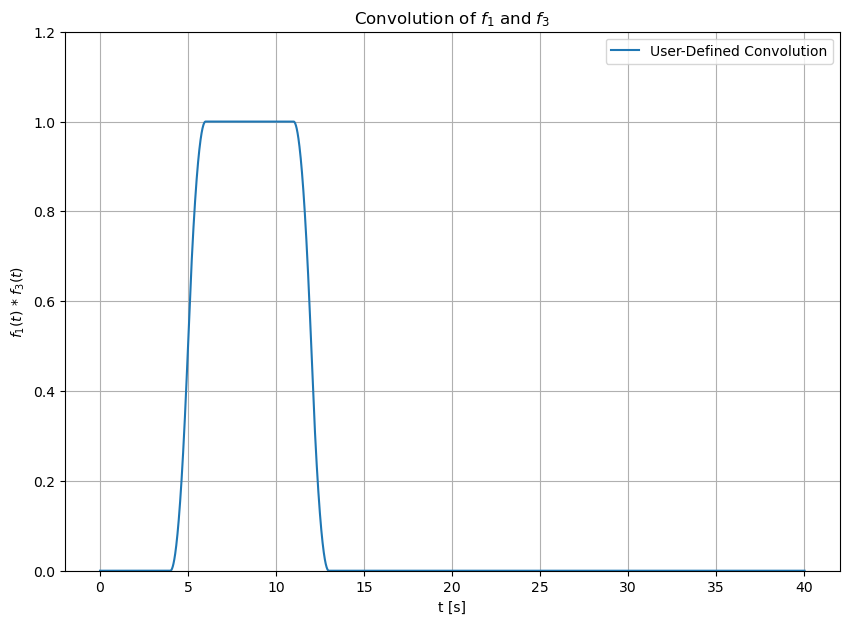

In [7]:
# Insert code to plot the appropriate convolution here
conv13 = manual_conv(f1, f3)*steps

plt.figure(figsize=(10, 7))
plt.plot(tExtended, conv13, label='User-Defined Convolution')
plt.ylim([0, 1.2])
plt.grid()
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('$f_1(t)$ * $f_3(t)$')
plt.title('Convolution of $f_1$ and $f_3$')
plt.show()

5. Verify your convolution function is working correctly using the **scipy.signal.convolve()** function by plotting the convolutions from **Task 2**, **Task 3**, and **Task 4** in one figure with three subplots.

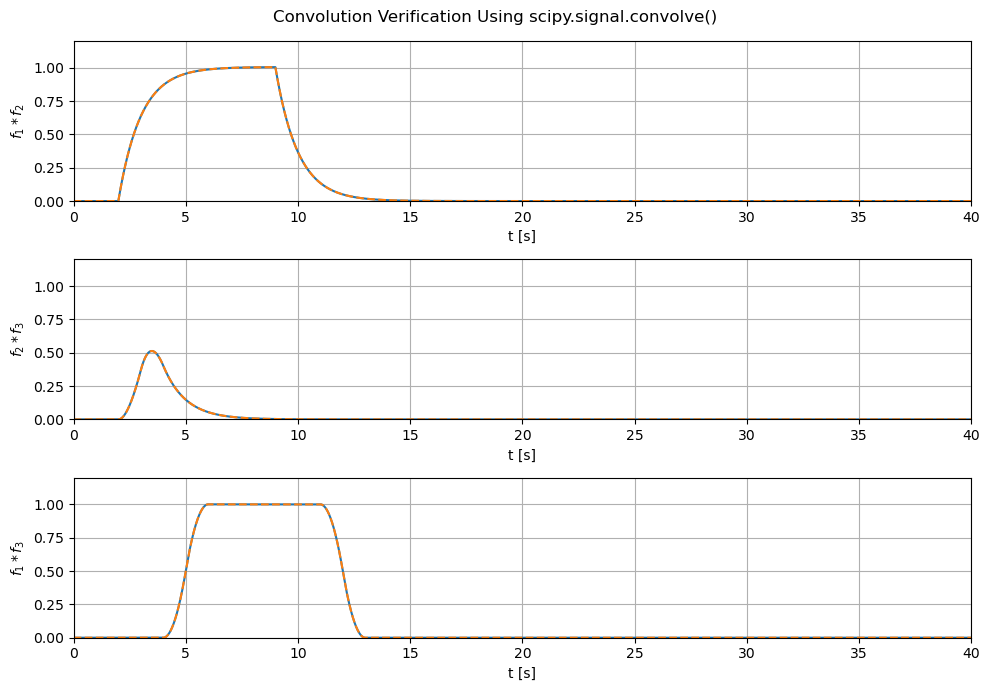

In [9]:
# Insert code using sig.convolve() to plot the convolutions from task 2, 3, and 4 in one figure with three subplots here.
import scipy.signal as sig

conv12Check = sig.convolve(f1, f2)*steps
conv23Check = sig.convolve(f2, f3)*steps
conv13Check = sig.convolve(f1, f3)*steps

plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.suptitle("Convolution Verification Using scipy.signal.convolve()")
plt.plot(tExtended, conv12, label='User-Defined Convolution')
plt.plot(tExtended, conv12Check, '--', label='Built-In Convolution')
plt.ylim([0, 1.2])
plt.xlim([0, 40])
plt.grid()
plt.ylabel("$f_1 * f_2$")
plt.xlabel("t [s]")

plt.subplot(3, 1, 2)
plt.plot(tExtended, conv23, label='User-Defined Convolution')
plt.plot(tExtended, conv23Check, '--', label='Built-In Convolution')
plt.ylim([0, 1.2])
plt.xlim([0, 40])
plt.grid()
plt.ylabel("$f_2 * f_3$")
plt.xlabel("t [s]")

plt.subplot(3, 1, 3)
plt.plot(tExtended, conv13, label='User-Defined Convolution')
plt.plot(tExtended, conv13Check, '--', label='Built-In Convolution')
plt.ylim([0, 1.2])
plt.xlim([0, 40])
plt.grid()
plt.ylabel("$f_1 * f_3$")
plt.xlabel("t [s]")
plt.tight_layout()
plt.show()

### 5. Questions
1. Did you work alone or with classmates on this lab? If you collaborated to get to the solution, what did that process look like?    
>Replace this text with your answer, but leave the ">" symbol.    
2. What was the most difficult part of this lab for you, and what did your problem-solving process look like? 
>Replace this text with your answer, but leave the ">" symbol.
3. Did you approach writing the code with analytical or graphical convolution in mind? Why did you chose this approach?
>Replace this text with your answer, but leave the ">" symbol.
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>Replace this text with your answer, but leave the ">" symbol.